<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Analysis_Freedom_Debt_Relief_Part11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [1]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.6 MB/s eta 0:00:00


In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import pycountry

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/My Drive/Freedom Debt Relief/

df= pd.read_csv('Freedom_Debt_Relief.csv')

Mounted at /content/drive/
/content/drive/My Drive/Freedom Debt Relief


In [4]:
df.head().T

,0,1,2,3,4
Reviewer Name,Andrea Sciotti,Wendy Sicard,Freida Towe,Jabrea Herron,William Lutz
Reviews Count,2reviews,1review,1review,1review,2reviews
Country Code,US,US,US,US,US
Experience Date,"December 04, 2019","December 04, 2019","December 04, 2019","December 04, 2019","December 04, 2019"
Rating,5,5,5,5,5
Review Date,"Dec 4, 2019","Dec 4, 2019","Dec 4, 2019","Dec 4, 2019","Dec 4, 2019"
Review Title,Working on a better future,Was very helpful,Very polite and kind,Great customer service,Needed an answer to a question…
Review Text,NaN,NaN,Very polite and kind. Did what I asked immedia...,There wasn't a long wait time . The representa...,Needed an answer to a question concerning a pa...
Reply Date,"Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 5, 2019","Reply from Freedom Debt ReliefDec 4, 2019"
Reply Text,"Hello, Andrea, thank you for your review! We w...","Hello, Wendy, thank you for your review! We wo...","Thank you very much, Freida! We truly care abo...","Jabrea, We are so happy to hear that you are h...","Hello William, thank you for sharing your expe..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    39068 non-null  object
 1   Reviews Count    39078 non-null  object
 2   Country Code     39078 non-null  object
 3   Experience Date  39078 non-null  object
 4   Rating           39078 non-null  int64 
 5   Review Date      39078 non-null  object
 6   Review Title     39074 non-null  object
 7   Review Text      34241 non-null  object
 8   Reply Date       37731 non-null  object
 9   Reply Text       37731 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


### DATA PREPROCESSING

In [6]:
# Filter the DataFrame based on 'updated' text in the 'Review Date' column
updated_reviews = df[df['Review Date'].str.contains('updated', case=False, na=False)].copy()

# Create a new column 'Updated_Date' with binary values
updated_reviews['Updated_Date'] = updated_reviews['Review Date'].str.contains('updated', case=False, na=False).astype(int)

# Get the number of data points containing 'updated'
num_updated_reviews = len(updated_reviews)
print(f"Number of data points containing 'updated': {num_updated_reviews}")

# Display the data points with 'updated' text in the 'Review Date' column and the new 'Updated_Date' column
print(updated_reviews[['Review Date', 'Updated_Date']])


Number of data points containing 'updated': 698
                Review Date  Updated_Date
9       Updated Dec 7, 2019             1
69     Updated Dec 12, 2019             1
106    Updated Nov 26, 2019             1
109    Updated Nov 26, 2019             1
209     Updated Nov 2, 2020             1
...                     ...           ...
38837   Updated Oct 4, 2020             1
38895   Updated Nov 5, 2020             1
38909  Updated Jun 17, 2021             1
38921  Updated Sep 20, 2020             1
39052  Updated Aug 31, 2020             1

[698 rows x 2 columns]


In [7]:
df.head()

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
0,Andrea Sciotti,2reviews,US,"December 04, 2019",5,"Dec 4, 2019",Working on a better future,NaN,"Reply from Freedom Debt ReliefDec 4, 2019","Hello, Andrea, thank you for your review! We w..."
1,Wendy Sicard,1review,US,"December 04, 2019",5,"Dec 4, 2019",Was very helpful,NaN,"Reply from Freedom Debt ReliefDec 4, 2019","Hello, Wendy, thank you for your review! We wo..."
2,Freida Towe,1review,US,"December 04, 2019",5,"Dec 4, 2019",Very polite and kind,Very polite and kind. Did what I asked immedia...,"Reply from Freedom Debt ReliefDec 4, 2019","Thank you very much, Freida! We truly care abo..."
3,Jabrea Herron,1review,US,"December 04, 2019",5,"Dec 4, 2019",Great customer service,There wasn't a long wait time . The representa...,"Reply from Freedom Debt ReliefDec 5, 2019","Jabrea, We are so happy to hear that you are h..."
4,William Lutz,2reviews,US,"December 04, 2019",5,"Dec 4, 2019",Needed an answer to a question…,Needed an answer to a question concerning a pa...,"Reply from Freedom Debt ReliefDec 4, 2019","Hello William, thank you for sharing your expe..."


In [8]:
# Filter the DataFrame based on 'updated' text in the 'Review Date' column
updated_reviews = df[df['Review Date'].str.contains('updated', case=False, na=False)]

# Get the number of data points containing 'updated'
num_updated_reviews = len(updated_reviews)
print(f"Number of data points containing 'updated': {num_updated_reviews}")

# Display the data points with 'updated' text in the 'Review Date' column
print(updated_reviews)

Number of data points containing 'updated': 698
              Reviewer Name Reviews Count Country Code     Experience Date  \
9             Jacey Roncali      3reviews           US   December 03, 2019   
69                    Emily      3reviews           US   November 28, 2019   
106           James Perkins      4reviews           US   November 26, 2019   
109             Wilda Valle       1review           US   November 26, 2019   
209            Pat Kilbourn      2reviews           US   November 22, 2019   
...                     ...           ...          ...                 ...   
38837  Oscar Bernales Simon       1review           US  September 29, 2020   
38895       Victoria Watson      3reviews           US  September 24, 2020   
38909                Sylvia      2reviews           US  September 22, 2020   
38921              Mai Vang      2reviews           AU  September 20, 2020   
39052       bridget swenson       1review           US     August 31, 2020   

       Rating  

In [9]:
# Remove "review" and "reviews" from the values in the "Reviews Count" column
df['Reviews Count'] = df['Reviews Count'].str.replace('reviews', '').str.replace('review', '')

# Convert the "Reply Date" column to a string data type
df['Reply Date'] = df['Reply Date'].astype(str)

# Remove "Reply from Freedom Debt Relief" from the "Reply Date" column in the existing DataFrame
df['Reply Date'] = df['Reply Date'].str.replace("Reply from Freedom Debt Relief", "")

# Convert 'Experience Date', 'Review Date', 'Reply Date' columns to date
df[['Experience Date', 'Review Date', 'Reply Date']] = df[['Experience Date', 'Review Date', 'Reply Date']].apply(pd.to_datetime, errors='coerce')

# Convert "Reviews Count" column to integer
df['Reviews Count'] = pd.to_numeric(df['Reviews Count'], errors='coerce').astype('Int64')

In [10]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

Reviewer Name        10
Reviews Count         0
Country Code          0
Experience Date       0
Rating                0
Review Date         791
Review Title          4
Review Text        4837
Reply Date         1684
Reply Text         1347
dtype: int64


In [11]:
# Drop rows with missing values in specific columns
df.dropna(subset=['Reviewer Name', 'Experience Date', 'Rating', 'Review Date', 'Review Title', 'Review Text'], inplace=True)

In [12]:
# Add a new column with country names
df['Country Name'] = df['Country Code'].apply(lambda code: pycountry.countries.get(alpha_2=code).name if pycountry.countries.get(alpha_2=code) else None)

# Replace the existing 'Country Name' column with the updated one
df['Country Name'] = df['Country Name']

# Display the updated DataFrame
df.head().T

,2,3,4,5,6
Reviewer Name,Freida Towe,Jabrea Herron,William Lutz,John Novotny,Maria S
Reviews Count,1,1,2,1,1
Country Code,US,US,US,US,US
Experience Date,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Rating,5,5,5,5,1
Review Date,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Review Title,Very polite and kind,Great customer service,Needed an answer to a question…,i had a question,This company charges outrageous…
Review Text,Very polite and kind. Did what I asked immedia...,There wasn't a long wait time . The representa...,Needed an answer to a question concerning a pa...,I got my answer right away . very professional.,This company charges outrageous settlement fee...
Reply Date,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Reply Text,"Thank you very much, Freida! We truly care abo...","Jabrea, We are so happy to hear that you are h...","Hello William, thank you for sharing your expe...","John, thank you for your review. We strive to ...","We apologize, Ms. Maria, for any frustrations ..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33454 entries, 2 to 39077
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    33454 non-null  object        
 1   Reviews Count    33454 non-null  Int64         
 2   Country Code     33454 non-null  object        
 3   Experience Date  33454 non-null  datetime64[ns]
 4   Rating           33454 non-null  int64         
 5   Review Date      33454 non-null  datetime64[ns]
 6   Review Title     33454 non-null  object        
 7   Review Text      33454 non-null  object        
 8   Reply Date       31901 non-null  datetime64[ns]
 9   Reply Text       32135 non-null  object        
 10  Country Name     33454 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(6)
memory usage: 3.1+ MB


In [14]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned1.csv', index=False)

**Unique Values**

In [15]:
df.nunique()

Reviewer Name      27628
Reviews Count         29
Country Code          50
Experience Date     2807
Rating                 5
Review Date         2823
Review Title       28611
Review Text        33371
Reply Date          1633
Reply Text         24180
Country Name          50
dtype: int64

## RATING ANALYSIS BY COUNTRY

In [31]:
# Number of unique countries
number_of_countries = df['Country Name'].nunique()
print("Number of unique countries:", number_of_countries)

Number of unique countries: 50


In [34]:
# Extract unique country codes and their counts
unique_country_codes = df['Country Code'].unique()
code_counts = df['Country Code'].value_counts().reset_index()
code_counts.columns = ['Country Code', 'Number of Codes']

# Create a new DataFrame with the unique country codes and their counts
new_df = pd.DataFrame({'Country Code': unique_country_codes})
new_df = new_df.merge(code_counts, on='Country Code', how='left')

# Sort the new DataFrame in descending order based on the 'Number of Codes' column
new_df = new_df.sort_values(by='Number of Codes', ascending=False)

# Reset the index
new_df = new_df.reset_index(drop=True)

# Display the first 10 rows with country names
first_10 = new_df.head(10).copy()  # Ensure you create a copy

# Map country codes to names using pycountry
first_10.loc[:, 'Country Name'] = first_10['Country Code'].apply(lambda code: pycountry.countries.get(alpha_2=code).name)

print(first_10[['Country Code', 'Number of Codes', 'Country Name']])

  Country Code  Number of Codes    Country Name
0           US            33254   United States
1           PR               69     Puerto Rico
2           MX               15          Mexico
3           GU               12            Guam
4           GB                9  United Kingdom
5           CA                8          Canada
6           PH                7     Philippines
7           DE                6         Germany
8           AU                5       Australia
9           IQ                4            Iraq


In [35]:
# Calculate the mean ratings
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Merge the mean ratings with the first_10_copy DataFrame
first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')

# If 'first_10_copy' is missing the 'Mean Rating' column, make sure to recreate it
if 'Mean Rating' not in first_10_copy.columns:
    first_10_copy['Mean Rating'] = mean_ratings['Mean Rating']

print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name', 'Mean Rating']])

  Country Code  Number of Codes    Country Name  Mean Rating
0           US            33254   United States     3.666667
1           PR               69     Puerto Rico     5.000000
2           MX               15          Mexico     5.000000
3           GU               12            Guam     4.200000
4           GB                9  United Kingdom     5.000000
5           CA                8          Canada     5.000000
6           PH                7     Philippines     5.000000
7           DE                6         Germany     4.500000
8           AU                5       Australia     4.875000
9           IQ                4            Iraq     5.000000


<ipython-input-36-6d30c0931e55>:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Mean Rating_original'} in the result is deprecated and will raise a MergeError in a future version.
  first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left', suffixes=('_original', '_mean'))


  Country Code  Number of Codes    Country Name  Mean Rating
0           US            33254   United States     3.666667
1           PR               69     Puerto Rico     5.000000
2           MX               15          Mexico     5.000000
3           GU               12            Guam     4.200000
4           GB                9  United Kingdom     5.000000
5           CA                8          Canada     5.000000
6           PH                7     Philippines     5.000000
7           DE                6         Germany     4.500000
8           AU                5       Australia     4.875000
9           IQ                4            Iraq     5.000000


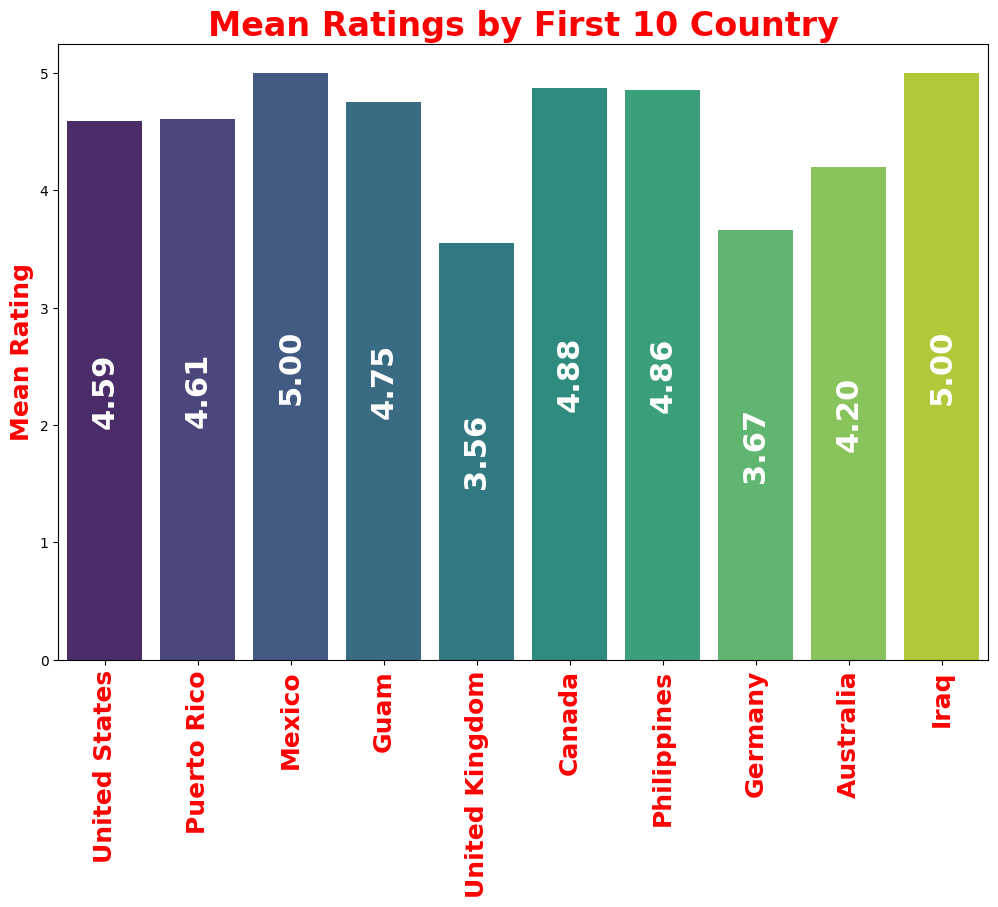

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean ratings
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Merge the mean ratings with the first_10_copy DataFrame
first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left', suffixes=('_original', '_mean'))

# If 'first_10_copy' is missing the 'Mean Rating' column, make sure to recreate it
if 'Mean Rating' not in first_10_copy.columns:
    first_10_copy['Mean Rating'] = mean_ratings['Mean Rating']

# Display the DataFrame with mean ratings
print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name', 'Mean Rating']])

# Bar plot for Mean Ratings by Country
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Country Name', y='Mean Rating_mean', data=first_10_copy, palette='viridis')
plt.title('Mean Ratings by First 10 Country', fontsize=24, fontweight='bold', color='red')
plt.xlabel('', fontsize=14)
plt.ylabel('Mean Rating', fontsize=18, fontweight='bold', color='red')
plt.xticks(rotation=90, fontsize=18, fontweight='bold', color='red')

# Add labels to the bars at the center of each bar
for i, val in enumerate(first_10_copy['Mean Rating_mean']):
    ax.text(i, val/2, f'{val:.2f}', ha='center', va='center', fontsize=22, fontweight='bold', color='white', rotation=90)

plt.show()

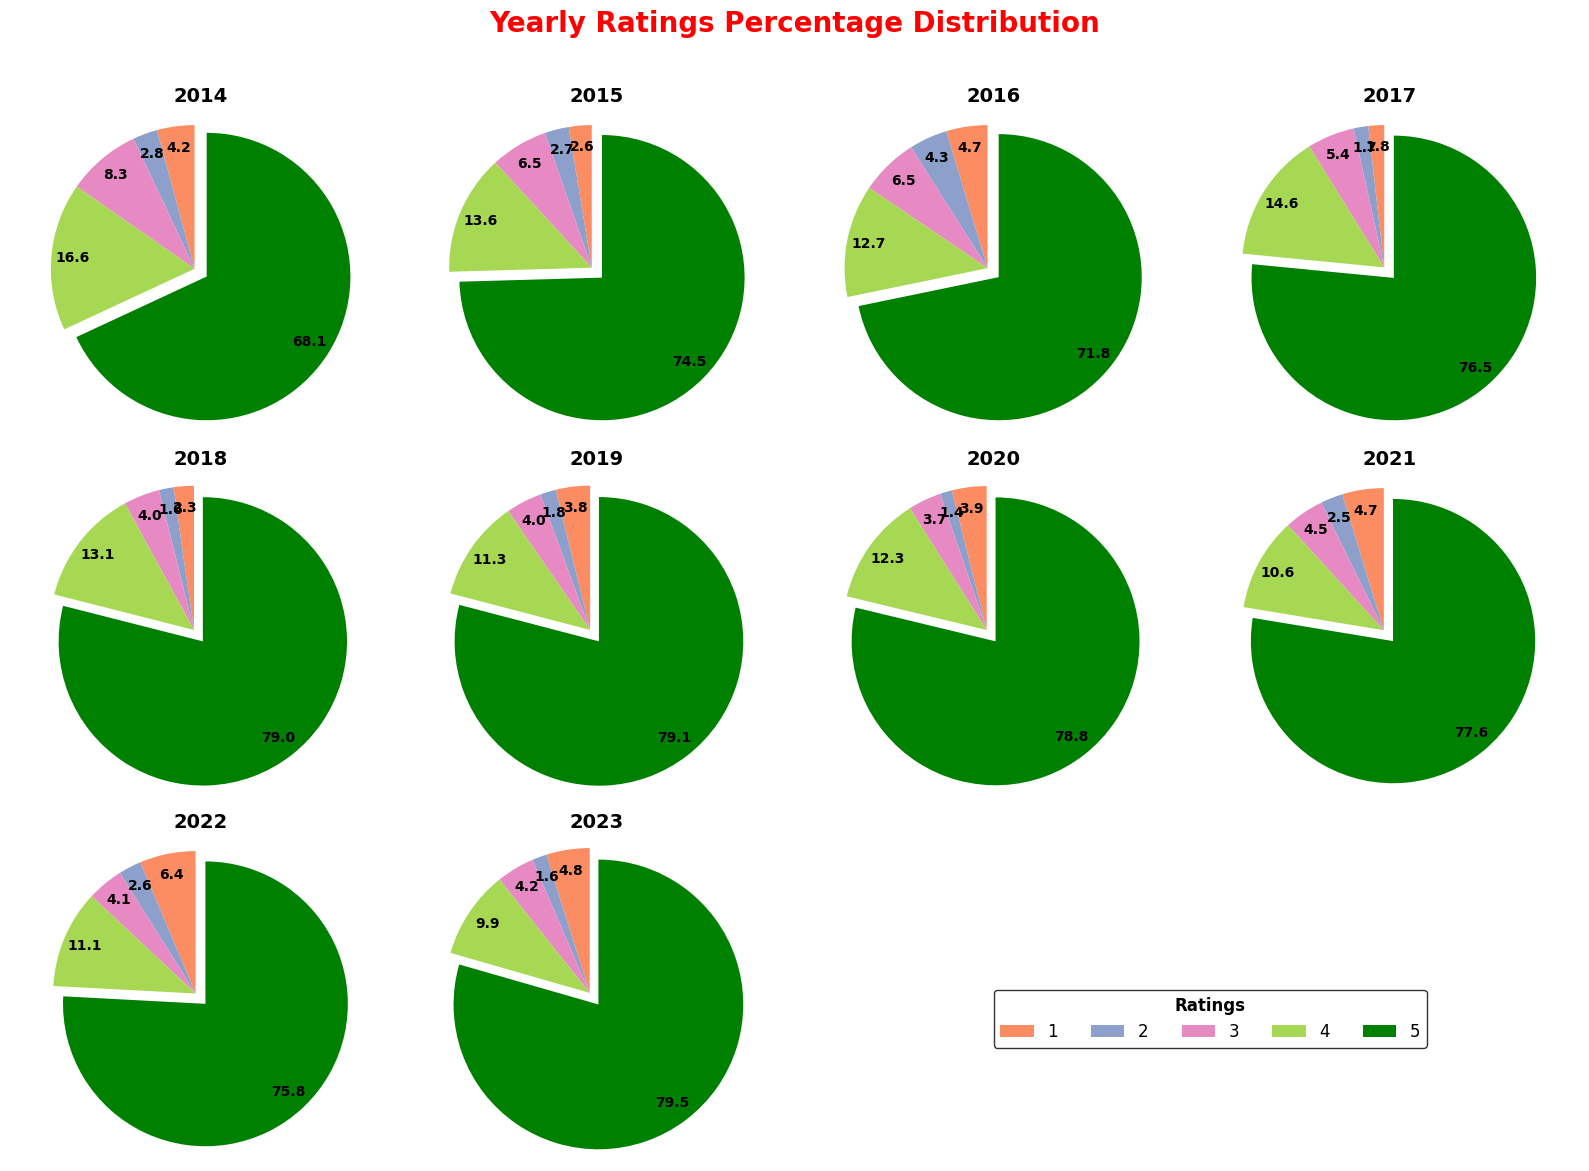

In [101]:
# Create a figure with separate subplots for each year
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each year and create a pie chart
for ax, (year, ratings) in zip(axes, yearly_rating_counts.iterrows()):
    colors = plt.cm.Set2(np.arange(1, len(ratings) + 1))  # Change color palette to Set2

    # Change the color of the "5" rating to green
    colors = ['green' if rating == 5 else color for rating, color in zip(ratings.index, colors)]

    explode = tuple(0.1 if i == ratings.idxmax() else 0 for i in range(1, len(ratings) + 1))

    # Check if ratings are not all zeros
    if not ratings.eq(0).all():
        # Adjust autopct to show percentages as numbers
        ax.pie(ratings, labels=None, autopct=lambda p: f'{p:.1f}', startangle=90, colors=colors, explode=explode, pctdistance=0.85, textprops={'fontsize': 10, 'weight': 'bold'})
        ax.set_title(f'{year}', fontsize=14, weight='bold')
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Create a legend at the lower right with a centered layout
legend = fig.legend(ratings.index, title='Ratings', loc='lower right', bbox_to_anchor=(0.9, 0.1), fontsize=12, title_fontsize=12, edgecolor='black', ncol=len(ratings.index))
legend.get_title().set_fontweight('bold')  # Set fontweight for legend title

# Add a main title above the subplots
plt.figtext(0.5, 0.96, 'Yearly Ratings Percentage Distribution', ha='center', va='center', fontsize=20, fontweight='bold', color='red')

# Remove empty subplots from the layout
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust the rect parameter to leave space for the main title

# Show the pie charts
plt.show()


## Aggregation and Grouping (yearly, quarterly, monthly):


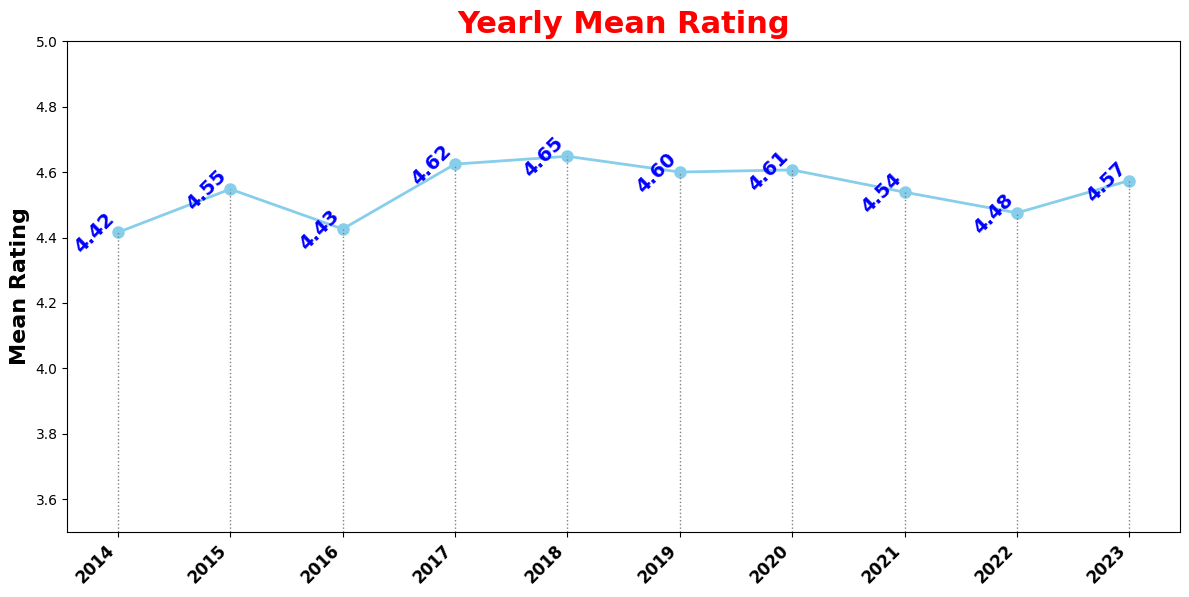

In [111]:
# Group data by year and calculate the mean rating for each year
yearly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Y')).agg({'Rating': 'mean'})

# Create a line plot for yearly mean rating with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(
    yearly_mean_rating.index.strftime('%Y'),
    yearly_mean_rating['Rating'],
    marker='o',
    color='skyblue',
    linewidth=2,
    markersize=8,
)

# Set the y-axis range to 3.5 to 5
plt.ylim(3.5, 5)

# Add labels and titles
plt.title('Yearly Mean Rating', fontsize=16, fontweight='bold', color='black')  # Default title color
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rating', fontsize=16, fontweight='bold')

# Rotate x-axis labels for readability (rotate 45 degrees)
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')  # Make x-axis labels bold

# Annotate data values on the line plot and draw lines to x-axis
for x, y in zip(yearly_mean_rating.index.strftime('%Y'), yearly_mean_rating['Rating']):
    plt.annotate(
        f'{y:.2f}',
        (x, y),
        textcoords='offset points',
        xytext=(0, -15),  # Adjust the y-coordinate to move labels to the bottom
        ha='right',  # Rotate 45 degrees
        fontsize=14,
        color='blue',
        fontweight='bold',
        rotation=45,  # Rotate the label
    )
    plt.vlines(x, 3.5, y, colors='gray', linestyles='dotted', lw=1)

# Show the plot
plt.tight_layout()

# Set the title font properties
title = plt.title('Yearly Mean Rating', fontsize=22, fontweight='bold', color='red')  # Updated title color

# Show the plot
plt.show()



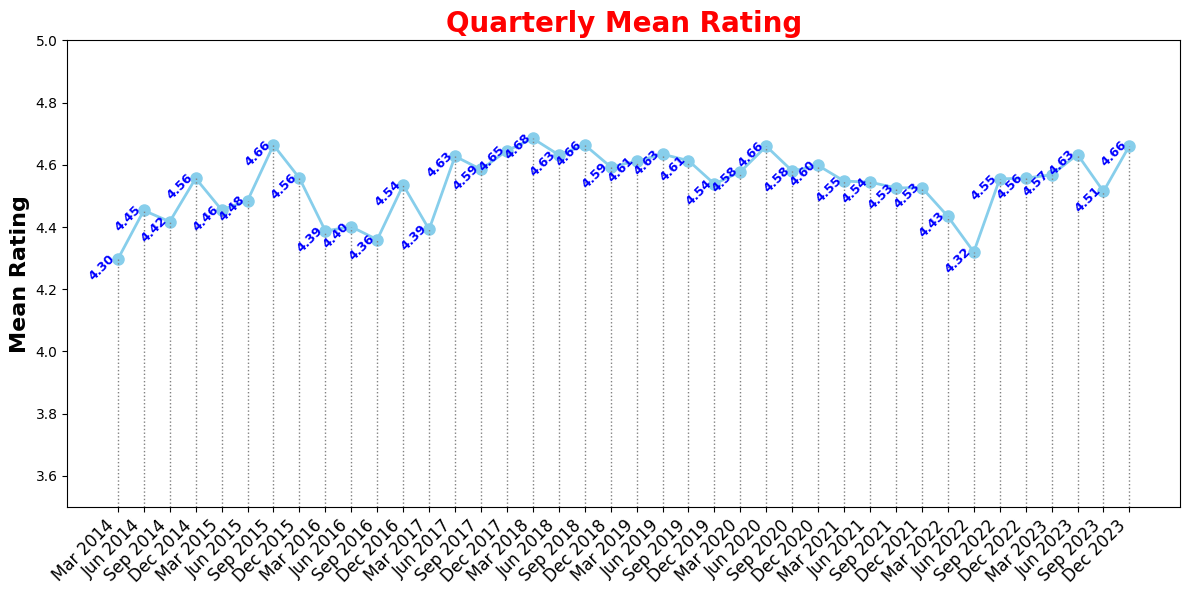

In [112]:
# Group data by quarter and calculate the mean rating for each quarter
quarterly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Q')).agg({'Rating': 'mean'})

# Create a line plot for quarterly mean rating with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(
    quarterly_mean_rating.index.strftime('%b %Y'),
    quarterly_mean_rating['Rating'],
    marker='o',
    color='skyblue',
    linewidth=2,
    markersize=8,
)

# Set the y-axis range to 3.5 to 5
plt.ylim(3.5, 5)

# Add labels and titles
plt.title('Quarterly Mean Rating', fontsize=16, fontweight='bold', color='black')  # Default title color
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rating', fontsize=16, fontweight='bold')

# Rotate x-axis labels for readability (rotate 45 degrees)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Annotate data values on the line plot and draw lines to x-axis
for x, y in zip(quarterly_mean_rating.index.strftime('%b %Y'), quarterly_mean_rating['Rating']):
    plt.annotate(
        f'{y:.2f}',
        (x, y),
        textcoords='offset points',
        xytext=(0, -15),  # Adjust the y-coordinate to move labels to the bottom
        ha='right',  # Rotate 45 degrees
        fontsize=9,
        color='blue',
        fontweight='bold',
        rotation=45,  # Rotate the label
    )
    plt.vlines(x, 3.5, y, colors='gray', linestyles='dotted', lw=1)

# Show the plot
plt.tight_layout()

# Set the title font properties
title = plt.title('Quarterly Mean Rating', fontsize=20, fontweight='bold', color='red')  # Updated title color

# Show the plot
plt.show()



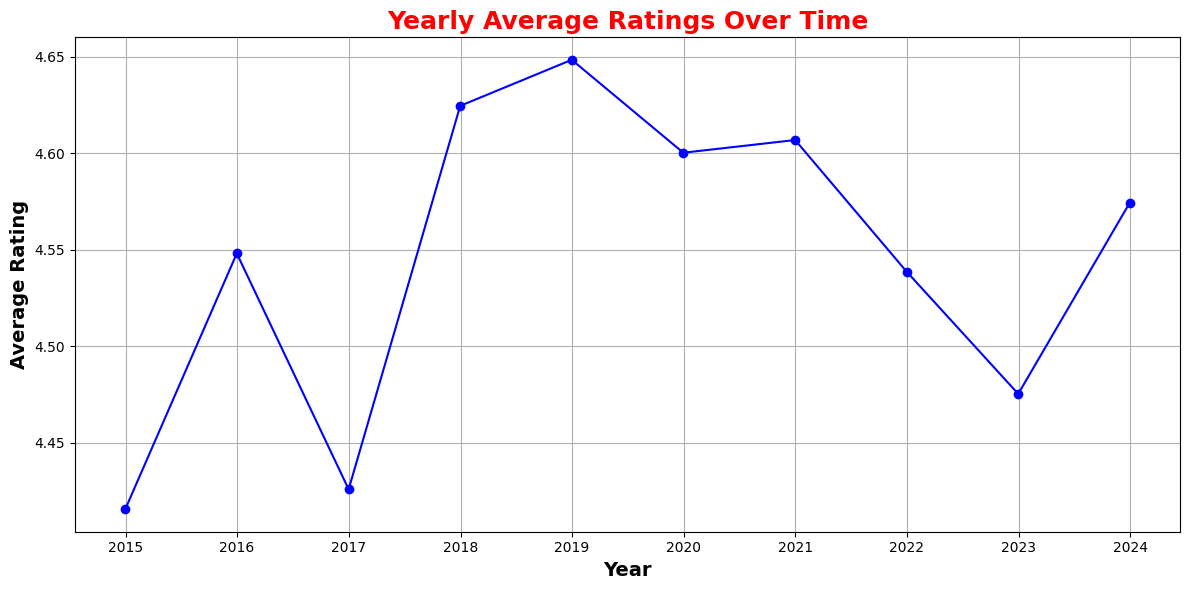

In [121]:
# Downsample the data by averaging ratings by year
yearly_ratings = df.resample('Y', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Average Ratings Over Time', fontsize=18, fontweight='bold', color='red')  # Updated title color
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Convert the downsampled ratings to a DataFrame
yearly_ratings_df = yearly_ratings.to_frame().reset_index()
yearly_ratings_df.columns = ['Year', 'Average Rating']

# Save the DataFrame to a CSV file
yearly_ratings_df.to_csv('yearly_ratings.csv', index=False)


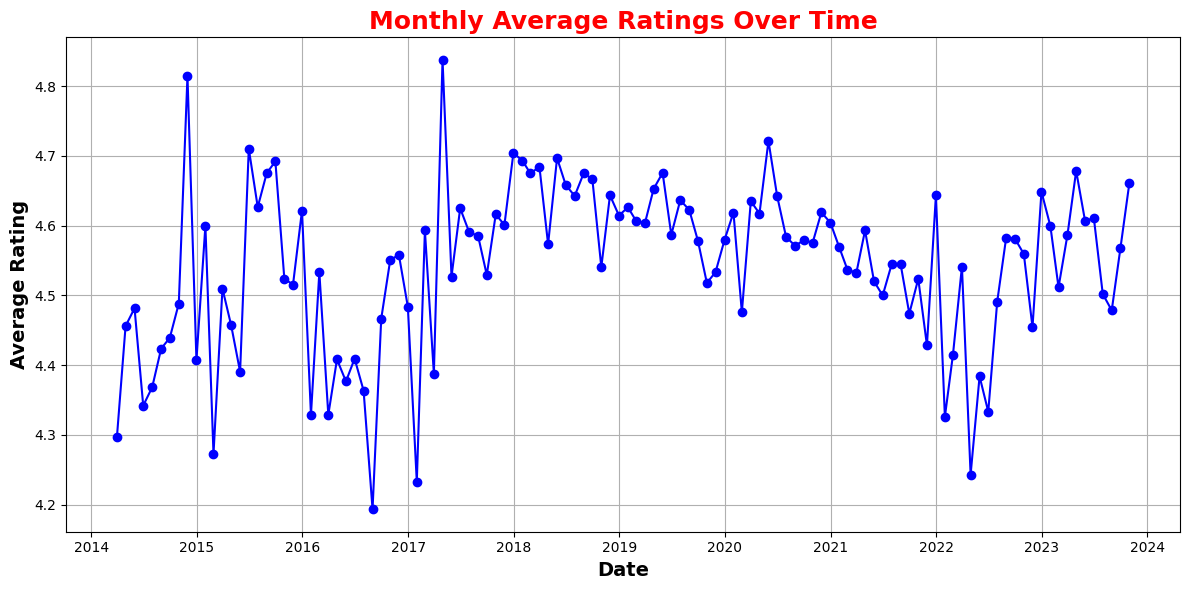

In [120]:
# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Ratings Over Time', fontsize=18, fontweight='bold', color='red')  # Updated title color
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.grid(True)

# Set x-axis tick locator and formatter for years only
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')  # Display years as four-digit numbers

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Show the plot
plt.tight_layout()
plt.show()

# Convert the downsampled ratings to a DataFrame
monthly_ratings_df = monthly_ratings.to_frame().reset_index()
monthly_ratings_df.columns = ['Date', 'Average Rating']

# Save the DataFrame to a CSV file
monthly_ratings_df.to_csv('monthly_ratings.csv', index=False)



## Date-Related Calculations:

a. Calculate Time Difference: Calculate the time difference between two date columns. For instance, you can calculate the response time by subtracting the review date from the reply date.

In [ ]:
df['Review Response'] = df['Review Date'] - df['Experience Date']

df['Reply Response'] = df['Reply Date'] - df['Review Date']

In [ ]:
df.head()

b. Extract Date Components: Extract specific components from the date, such as year, month, day, or weekday.

In [ ]:
df['Year'] = df['Review Date'].dt.year
df['Month'] = df['Review Date'].dt.month
df['Day'] = df['Review Date'].dt.day
df['Weekday'] = df['Review Date'].dt.day_name()

### Ratings Over Time (Monthly Average)

In [ ]:
# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Ratings Over Time', fontsize=18, fontweight='bold', color='red')  # Updated title color
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.grid(True)

# Set x-axis tick locator and formatter for years only
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')  # Display years as four-digit numbers

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Show the plot
plt.tight_layout()
plt.show()

# Convert the downsampled ratings to a DataFrame
monthly_ratings_df = monthly_ratings.to_frame().reset_index()
monthly_ratings_df.columns = ['Date', 'Average Rating']

# Save the DataFrame to a CSV file
monthly_ratings_df.to_csv('monthly_ratings.csv', index=False)

# Display the DataFrame
print("Downsampled Monthly Ratings as DataFrame:")
print(monthly_ratings_df)


### Visualization for Mean Rating by Year and Month:

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month.

In [ ]:
# Mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

In [ ]:
# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

print("Mean Rating by Month:")
print(mean_rating_by_month)

# Create subplots for both graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the mean rating by year
ax1.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
ax1.set_title('Mean Rating by Year', fontsize=16, color='red', fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax1.grid(True)

# Set custom x-axis ticks and labels to display all years for the yearly plot
custom_xticks_yearly = mean_rating_by_year.index
ax1.set_xticks(custom_xticks_yearly)
ax1.set_xticklabels(custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the mean rating by month
ax2.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g')
ax2.set_title('Mean Rating by Month', fontsize=16, color='red', fontweight='bold')
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax2.grid(True)

# Set custom x-axis ticks and labels to display all 12 months for the monthly plot
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(custom_xticks_monthly)
ax2.set_xticklabels(custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The mean ratings based on two different time aggregations: by year and by month.

Let's discuss and conclude the insights from this data:

**Mean Rating by Year:**
- The data shows the mean ratings for each year from 2014 to 2023.
- In 2014, the mean rating was approximately 4.41, indicating a relatively positive sentiment in customer reviews.
- The mean rating increased in 2015 to approximately 4.54, suggesting an improvement in customer satisfaction.
- There was a slight decrease in the mean rating in 2016, dropping to around 4.42.
- Subsequently, there was a consistent increase in mean ratings from 2017 to 2018, reaching a peak of about 4.66.
- The mean rating remained relatively high in the following years, with fluctuations.
- In 2023, the mean rating reached approximately 4.58.

**Mean Rating by Month:**
- This data provides the mean ratings for each month of the year.
- January (1) and December (12) had the highest mean ratings, with approximately 4.60 and 4.65, respectively. These months might correspond to periods of higher customer satisfaction.
- April (4) and October (10) had slightly lower mean ratings, around 4.58.
- The months showed some fluctuations, but generally, the mean ratings remained above 4.57 throughout the year.

**Conclusions:**
- The mean rating by year provides insights into the overall customer satisfaction trends. While there were some fluctuations, it's evident that ratings improved from 2014 to 2018, remained relatively stable until 2022, and saw a slight increase in 2023.
- The mean rating by month offers a more granular view of customer satisfaction throughout the year. January and December had the highest ratings, possibly due to seasonal factors or holidays.
- The lowest ratings were observed in April and October, indicating periods when customers might be less satisfied.

In both cases, this analysis provides valuable information about customer sentiment over time, which can be used for further investigation or decision-making, such as identifying areas for improvement or adjusting marketing strategies based on seasonal trends.

### Time Series Plot of Ratings Over Time:



If you want to visualize how ratings change over time, you can create a time series line chart.

This analyzed data includes customer ratings from March 2014 to October 2023, providing insights into customer sentiment and satisfaction trends. The objective is to inform data-driven decision-making and enhance our services to meet customer expectations.

**Key Findings**

1. **Consistent Positive Sentiment**: The data reveals a consistent positive sentiment among customers, with average ratings ranging between 4.2 and 4.7. This indicates a high level of overall satisfaction with our services.

2. **Seasonal Variations**: Seasonal variations in ratings are observed, with some months showing higher average ratings and others lower. Identifying the factors contributing to these seasonal fluctuations can help optimize service delivery and resource allocation.

3. **Annual Trends**: Over the years, annual trends are evident, with specific periods exhibiting higher or lower average ratings. Understanding these trends can inform strategic planning and resource allocation.

4. **Data-Driven Decisions**: The dataset provides the opportunity to make data-driven decisions for service enhancement. Analyzing customer feedback and its correlation with ratings can guide improvements in specific areas of service delivery.

5. **Competitive Advantage**: Maintaining consistently high ratings positions Freedom Debt Relief Company as a market leader. Leveraging customer satisfaction can attract new clients and bolster our competitive advantage.

**Recommendations**

- Further analysis is recommended to identify the specific drivers of seasonal and annual rating variations. This analysis should include examining customer feedback for insights.
- Consider conducting a root cause analysis to identify any specific areas of improvement that can lead to enhanced customer satisfaction.

Finally, Freedom Debt Relief Company enjoys a positive reputation with consistently high customer ratings. Leveraging this reputation for continuous improvement is essential for maintaining a competitive advantage. By delving deeper into the drivers of rating variations and aligning service delivery with customer expectations, we can further solidify our position in the market.


In [ ]:
# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

# Create a plot for the mean rating by year
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Mean Rating by Year', fontsize=18, fontweight='bold', color='red')  # Title with 18 pt and bold
plt.xlabel('Year', fontsize=12, fontweight='bold')  # xlabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')  # ylabel with 12 pt and bold
plt.grid(True)

# Set custom x-axis ticks and labels to display all years
custom_xticks_yearly = mean_rating_by_year.index
plt.xticks(custom_xticks_yearly, custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Month:")
print(mean_rating_by_month)

# Set seaborn style for enhanced aesthetics
sns.set(style="whitegrid")

# Create a plot for the mean rating by month with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g', linewidth=2)

# Title with 18 pt and bold
plt.title('Mean Rating by Month', fontsize=18, fontweight='bold', color='red')

# xlabel with 12 pt and bold
plt.xlabel('Month', fontsize=12, fontweight='bold')

# ylabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')

# Set custom x-axis ticks and labels to display all 12 months
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(custom_xticks_monthly, custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


### Histogram of Ratings:



A histogram will show the distribution of ratings. You can see how many ratings fall into each category

In [ ]:
# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot of ratings
plt.figure(figsize=(8, 6))
rating_counts = df['Rating'].value_counts().sort_index()
ax = plt.bar(rating_counts.index, rating_counts, color='skyblue', edgecolor='black')

# Set custom bar labels at the center of each bar
for bar in ax:
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    plt.text(bar_x, bar_height, str(int(bar_height)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add title, xlabel, and ylabel with specified font sizes and styles
plt.title('Distribution of Ratings', fontsize=18, fontweight='bold', color='red')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the distribution of ratings
print("Distribution of Ratings:")
print(rating_counts)


The distribution of ratings, as provided in the histogram results, offers insights into how customers have rated a product or service.

Here is a discussion and conclusion based on the given distribution:

**Distribution of Ratings:**
- The data is divided into five rating categories: 1, 2, 3, 4, and 5.
- Each category represents the number of reviews with that particular rating.
- The highest number of reviews falls into the 5-star category, with a count of 30,639.
- The 4-star rating is the second most common, with 4,758 reviews.
- The 3-star rating has a count of 1,622.
- The 2-star rating is the least common among positive ratings, with only 694 reviews.
- The lowest rating, 1 star, has a count of 1,365.

**Discussion:**
- The data clearly shows that the majority of customers have given positive ratings, with 5-star and 4-star ratings being the most prevalent. This indicates that a substantial portion of customers are satisfied with the product or service, as these ratings are above the median score (3).
- The distribution is right-skewed, meaning there are far more positive reviews than negative ones. This skew suggests that the product or service generally meets customer expectations or even exceeds them.
- The relatively low counts in the 1-star and 2-star categories suggest that only a minority of customers expressed strong dissatisfaction.
- The 3-star category, while not as common as 4-star and 5-star ratings, still has a notable number of reviews, indicating a moderate level of satisfaction.

**Conclusion:**
The distribution of ratings reflects a generally positive sentiment among customers who have left reviews. The bulk of reviews fall into the higher rating categories, suggesting that the product or service is well-received. However, the existence of lower ratings (1 to 3 stars) indicates that there is room for improvement or that a subset of customers had less positive experiences.

To draw more specific conclusions or make further decisions based on this data, it may be helpful to conduct sentiment analysis on the reviews themselves or to analyze other factors, such as the time of the reviews or the topics mentioned in the reviews. This additional context can provide a deeper understanding of customer feedback.

### TEXT PREPROCESSING

#### Concatenate Review Title and Review Text Columns

In [ ]:
columns_to_concat = ['Review Title', 'Review Text']

# Concatenate the selected columns into a new column 'Concatenated_Text'
df['Concatenated_Text'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text and store them separately
        emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words and emojis back into a preprocessed text
        preprocessed_text = ' '.join(words) + ' '.join(emojis)
        return preprocessed_text
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [ ]:
df['Cleaned_Concatenated_Text'] = df['Concatenated_Text'].apply(preprocess_text)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Assuming df is your DataFrame
df.to_csv('Freedom_Debt_Relief2.csv', index=False)